In [104]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write as wavwrite
from scipy.io.wavfile import read as wavread
from scipy.fft import fft,fftfreq,rfft,rfftfreq,irfft
import time
from time import sleep
from IPython.display import Audio
from scipy import signal
import cv2 as cv
from matplotlib.pylab import cm
import librosa
import librosa.display

%matplotlib nbagg



#default values 
duration = 1 #seconds
sample_rate = 44100 # samples per second
base = "D:/ENTC/PROJECTS/signal-processing/sp_files/"


#unique file name generator
def unique_file_name(additional_name=""):
    return str(time.time()) + ("_" + additional_name if additional_name else "") 

In [105]:
filename = base + 'no-regrets.wav'
filename = base + 'notes-17.wav'
# filename = base + "notes-9.wav"


samples,sr = librosa.load(filename)

C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_9480/811269395.py:1: FutureWarning: Pass y=[ 2.5549455e-06 -3.2557607e-06  4.2098000e-06 ...  1.3403318e-04
  1.4350322e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(samples,sr=sr,n_mels=500,n_fft = 2**11,hop_length=2**11//4)


<IPython.core.display.Javascript object>


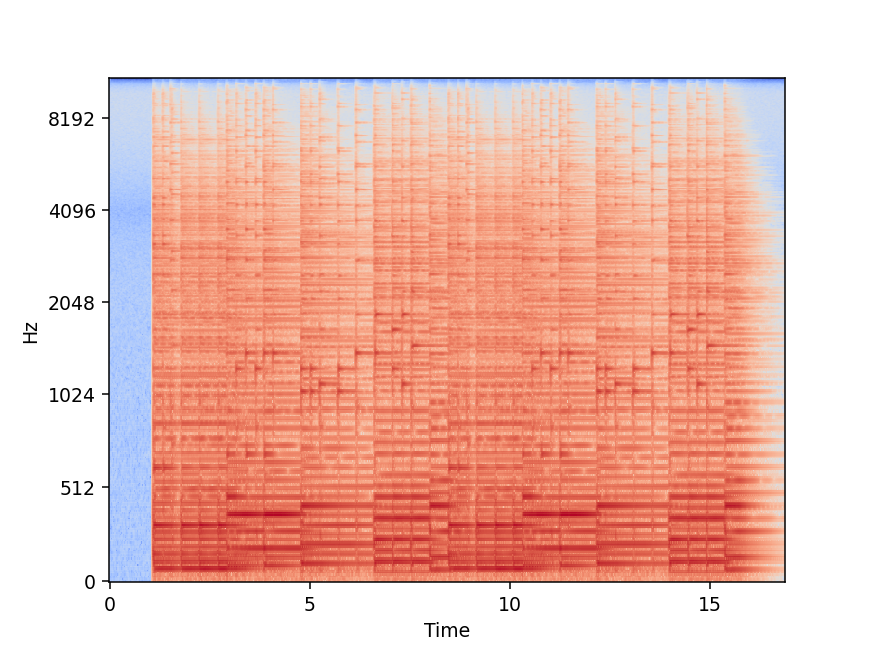

In [106]:
mel = librosa.feature.melspectrogram(samples,sr=sr,n_mels=500,n_fft = 2**11,hop_length=2**11//4)
log_mel = np.log(mel)


plt.figure()
librosa.display.specshow(log_mel,x_axis="time",y_axis="mel",sr=sr)
plt.show()

<IPython.core.display.Javascript object>


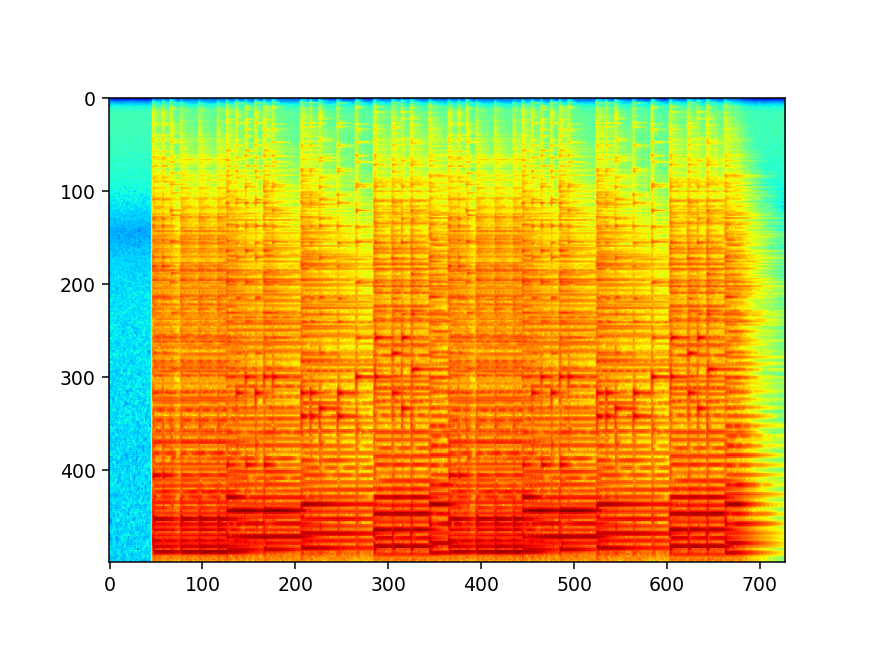

<IPython.core.display.Javascript object>


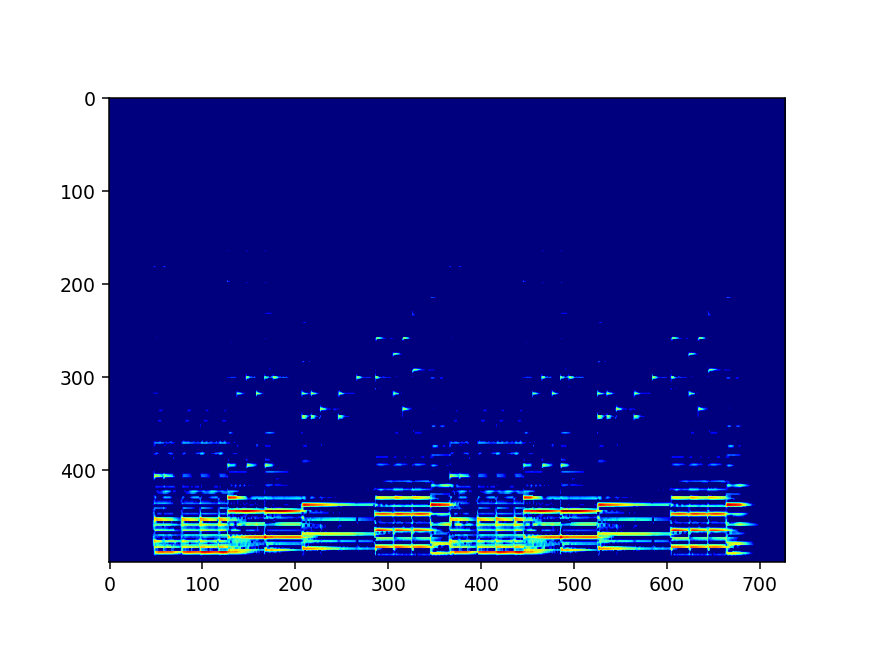

In [107]:

#get low frequencies to the bottom
zb_log_mel = log_mel[::-1,:]

#visualize the spectrum
fig,ax = plt.subplots(1)
ax.imshow(zb_log_mel,cmap="jet")
plt.show()

#tresholding
tresh_1 = 0.1
tr_zb_log_mel = zb_log_mel * np.float32(zb_log_mel > tresh_1 * zb_log_mel.max())

#erode
erosion_kernel = np.array([[1,1],
                          [1,1]])
eroded_tr_zb_log_mel = cv.erode(tr_zb_log_mel,erosion_kernel)

#visualizing
#visualize the spectrum
fig,ax = plt.subplots(1)
ax.imshow(eroded_tr_zb_log_mel,cmap="jet")


plt.show()

<IPython.core.display.Javascript object>


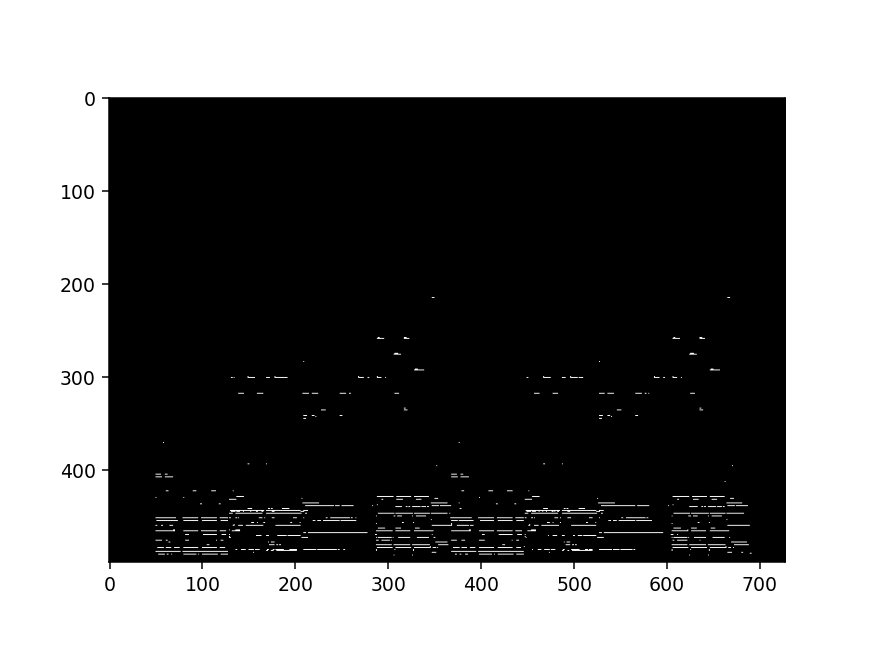

In [108]:
hor_kernel = np.array([[-1,-1,-2],
                      [4,3,1],
                      [-1,-1,-2]])

#emphasizing horizontal lines
hor_emph_eroded_tr_zb_log_mel = cv.filter2D(eroded_tr_zb_log_mel,-1,hor_kernel)

#thresholding ------ weighted according to freq
thresh2 = 0.5
len_weights = hor_emph_eroded_tr_zb_log_mel.shape[0]
ind_weights =np.linspace(0,1,len_weights)

tre_weights = [(i+1/len_weights)**2 for i in ind_weights]
tre_weights = [max((1/(1+x),0.8)) for x in tre_weights]
#making a column
tre_weights = np.array([tre_weights]).T
trb_hor_emph_eroded_tr_zb_log_mel =  np.float32((hor_emph_eroded_tr_zb_log_mel > thresh2 *tre_weights *  hor_emph_eroded_tr_zb_log_mel.max()))

# #dialate
# dilation_kernel = np.array([[1,1,1],
#                           [1,1,1],
#                            [1,1,1]])
# dil_trb_hor_emph_eroded_tr_zb_log_mel = cv.dilate(trb_hor_emph_eroded_tr_zb_log_mel,dilation_kernel)

#visualize the spectrum
fig,ax2 = plt.subplots(1)
ax2.imshow(trb_hor_emph_eroded_tr_zb_log_mel,cmap="gray")


plt.show()

<IPython.core.display.Javascript object>


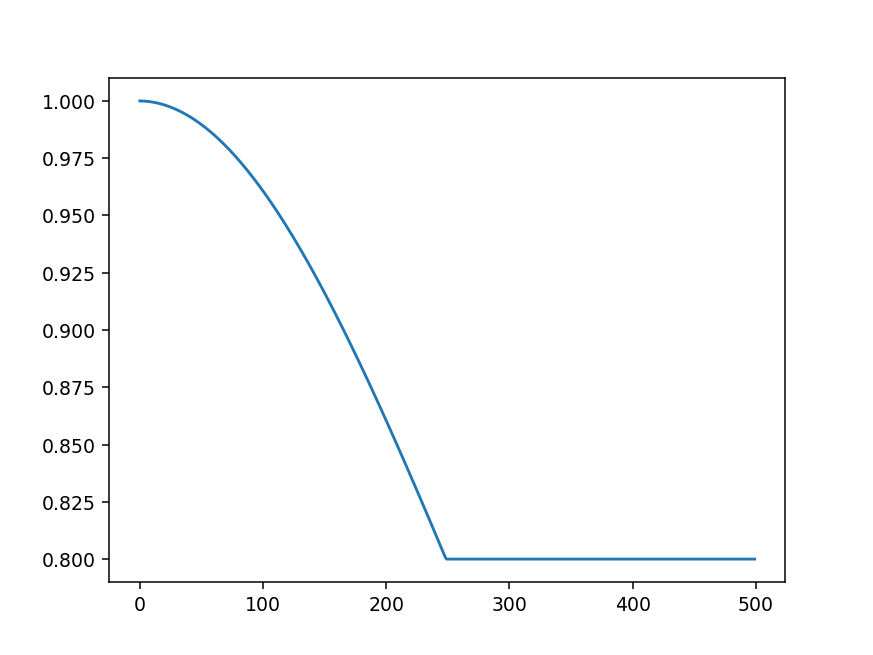

In [109]:
trb_hor_emph_eroded_tr_zb_log_mel.shape



fig,ax = plt.subplots(1)
ax.plot(tre_weights)
plt.show()